In [1]:
import os
import pandas as pd
subset = pd.read_csv("subset.csv")

In [3]:
import pandas as pd

# Group the data by the tags
grouped_df = subset.groupby('checked')

# Calculate the minimum frequency of tags across all classes
min_tag_frequency = grouped_df.size().min()

# Ensure that the desired number of rows (1,000) does not exceed the minimum tag frequency
num_rows_per_class = min(min_tag_frequency, 5000 // len(grouped_df))

# Sample the desired number of rows for each class
balanced_data = pd.DataFrame(columns=subset.columns)  # Empty DataFrame to store the balanced subset

for tag, group in grouped_df:
    sample = group.sample(n=num_rows_per_class, random_state=42)
    balanced_data = pd.concat([balanced_data, sample])

# Shuffle the rows of the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
balanced_data

,Id,Title,Body,cleaned_tags,checked,text,text_1
0,1175383,Changing <a> link underline color,I wonder if there is any trick to solve this p...,"['css', 'cross-browser']",css,Changing <a> link underline color I wonder if ...,change link underline color wonder trick solve...
1,150404,What is the easiest way to read/manipulate que...,The examples I've seen online seem much more c...,"['javascript', 'query-string']",javascript,What is the easiest way to read/manipulate que...,easy way read manipulate query string param us...
2,433802,Getting my head around jQuery,"OK, I'm designing a site and thought I'd stick...","['javascript', 'jquery']",javascript,"Getting my head around jQuery OK, I'm designin...",get head around jquery ok designing site think...
3,264745,BindingFlags.IgnoreCase not working for Type.G...,Imagine the following\n\nA type T has a field ...,"['c#', 'reflection', 'getproperty', 'bindingfl...",c#,BindingFlags.IgnoreCase not working for Type.G...,bindingflag ignorecase working type getpropert...
4,699677,.Net Changes the element IDs,.Net is kindly changing the element ids on my ...,['asp.net'],asp.net,.Net Changes the element IDs .Net is kindly ch...,net change element ids net kindly change eleme...
...,...,...,...,...,...,...,...
4995,620226,SQL Server 2005 Memory Pressure and tempdb wri...,We are having some issues with our production ...,"['sql-server', 'sql-server-2005', 'performance...",sql-server,SQL Server 2005 Memory Pressure and tempdb wri...,sql server memory pressure tempdb write proble...
4996,963084,Decomposing a 3d mesh into a 2d net,"Suppose you have a 3 dimensional object, repre...","['algorithm', 'graphics', '3d', 'mesh']",algorithm,Decomposing a 3d mesh into a 2d net Suppose yo...,decompose 3d mesh 2d net suppose dimensional o...
4997,1080523,composing multiple mysql scripts,Is it possible to INCLUDE other mysql scripts ...,"['mysql', 'linux', 'scripting']",mysql,composing multiple mysql scripts Is it possibl...,compose multiple mysql script possible include...
4998,839755,How to use time > year 2038 on official Window...,The official Python 2.5 on Windows was build w...,"['python', 'time', 'python-2.5', 'time-t', 'ye...",python,How to use time > year 2038 on official Window...,use time year official windows python official...


In [5]:
def one_hot_encode_subset(dataframe, tags_list):
    # Get the 'checked' column from the DataFrame as a list
    subset_labels = dataframe['checked'].tolist()

    # Create a set of all unique tags
    all_tags = set(tag[0] for tag in tags_list)

    # Create a dictionary to map tags to unique indices
    tag_to_index = {tag: i for i, tag in enumerate(all_tags)}

    # One-hot encode the subset column
    one_hot_encoded_subset = pd.get_dummies(subset_labels)

    # Reorder the columns to match the tags_list order
    one_hot_encoded_subset = one_hot_encoded_subset[[tag[0] for tag in tags_list]]

    return one_hot_encoded_subset

In [6]:
tags_list = [['c#'],
             ['java'],
             ['.net'],
             ['c++'],
             ['python'],
             ['javascript'],
             ['php'],
             ['asp.net'],
             ['sql'],
             ['c'],
             ['html'],
             ['sql-server'],
             ['jquery'],
             ['windows'],
             ['css'],
             ['iphone'],
             ['performance'],
             ['mysql'],
             ['algorithm'],
             ['visual-studio']]
one_hot_encoded_subset = one_hot_encode_subset(balanced_data, tags_list)

In [7]:
one_hot_encoded_subset

,c#,java,.net,c++,python,javascript,php,asp.net,sql,c,html,sql-server,jquery,windows,css,iphone,performance,mysql,algorithm,visual-studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4998,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np

def show_non_predicted_tags(model_name, y_pred_labels):
    """
    Calculate the percentage of non-tagged questions for a given model.

    Args:
        model_name (str): Name of the model.
        y_pred_labels (numpy array): Predicted labels.

    Returns:
        null_rate (float): Percentage of non-tagged questions for the model.
    """
    y_pred_labels_2d = y_pred_labels.reshape(-1, 1)  # Reshape to 2D array
    Tags_per_row = y_pred_labels_2d.sum(axis=1)
    null_rate = round(((Tags_per_row.size - np.count_nonzero(Tags_per_row))
                      / Tags_per_row.size) * 100, 2)

    print("-" * 50)
    print("Percentage of non-tagged questions for {} model".format(model_name))
    print("-" * 50)
    print("{}: {}%".format(model_name, null_rate))
    print()

    return null_rate


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics_scores(model_name, metrics_scores):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Plot the metrics scores
    sns.barplot(x=list(metrics_scores.keys()), y=list(metrics_scores.values()), ax=ax)

    # Set the labels and title
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(f"classification performance of {model_name}")

    # Add text annotations for the metrics scores
    for i, v in enumerate(metrics_scores.values()):
        ax.text(i, v, f"{v:.3f}", ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [27]:
import matplotlib.pyplot as plt

def plot_non_tagged_percentage(percentage_non_tagged):
    # Create a figure and axis
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Define the labels and sizes for the pie chart
    labels = ['Non-tagged', 'Tagged']
    sizes = [percentage_non_tagged, 100 - percentage_non_tagged]

    # Plot the pie chart
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Set the title
    plt.title("Percentage of Non-tagged Questions ")

    # Show the plot
    plt.tight_layout()
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split
# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text_1'], one_hot_encoded_subset, test_size=0.1, random_state=42)

In [11]:
# Convert y_train to 1D array of integers
y_train_labels = np.argmax(y_train.values, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

# n-grammes with SVM

L’approche présentée ci-dessus ne tient pas compte de l’ordre des mots. Chaque phrase est convertie en un sac de mots (ou bag of words). Il est néanmoins possible de tenir compte de séquence plus ou moins longue.

In [ ]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())
pipe.fit(X_train)
feat_train1 = pipe.transform(X_train)
feat_train1.shape

(5382, 266154)

In [ ]:
feat_test = pipe.transform(X_test)

In [ ]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize LinearSVC with OneVsRest
param_svc = {
    "estimator__C": [0.1, 1.0, 10.0],
    "estimator__penalty": ["l1", "l2"],
    "estimator__dual": [False],
    "estimator__loss": ["squared_hinge"],
    "estimator__max_iter": [1000, 2000, 5000]
}

multi_svc_cv = GridSearchCV(
    OneVsRestClassifier(LinearSVC(max_iter=1000)),
    param_grid=param_svc,
    n_jobs=-1,
    cv=2,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True,
    verbose=3
)
# Record the start time
start_time = time.time()

multi_svc_cv.fit(feat_train1, y_train_labels)
# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV Execution Time: {execution_time} seconds")

Fitting 2 folds for each of 18 candidates, totalling 36 fits
GridSearchCV Execution Time: 196.94733452796936 seconds


In [ ]:
# Save the best model with pickle
best_svc_model = multi_svc_cv.best_estimator_
with open("best_model_svc.pkl", "wb") as f:
    pickle.dump(best_svc_model, f)

In [ ]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize LinearSVC with OneVsRest
param_svc = {
    "estimator__C": [0.1, 1.0, 10.0],
    "estimator__penalty": ["l1", "l2"],
    "estimator__dual": [False],
    "estimator__loss": ["squared_hinge"],
    "estimator__max_iter": [1000, 2000, 5000]
}

multi_svc_cv = GridSearchCV(
    OneVsRestClassifier(LinearSVC(max_iter=1000)),
    param_grid=param_svc,
    n_jobs=-1,
    cv=2,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True,
    verbose=3
)
# Record the start time
start_time = time.time()

multi_svc_cv.fit(feat_train1, y_train_labels)
# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV Execution Time: {execution_time} seconds")

Fitting 2 folds for each of 18 candidates, totalling 36 fits
GridSearchCV Execution Time: 54.30985116958618 seconds


In [ ]:
best_svc_model = multi_svc_cv.best_estimator_
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_svc_model.predict(feat_test)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6971065791986121
Weighted Jaccard Coefficient: 0.5587073726524067
Accuracy: 0.7073578595317725
Weighted Recall: 0.7073578595317725
Weighted Precision: 0.7018927926463067


In [ ]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('N grammes and SVM', y_pred_labels)

--------------------------------------------------
Percentage of non-tagged questions for N grammes and SVM model
--------------------------------------------------
N grammes and SVM: 3.01%



3.01

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
html		python
visual-studio		visual-studio
algorithm		algorithm
html		html
sql-server		sql-server
python		python
java		java
html		html
c		c++
javascript		javascript
performance		performance
algorithm		algorithm
php		php
iphone		iphone
sql-server		.net
asp.net		asp.net
php		php


In [28]:
model_name = "n-grammes with SVM"
metrics_scores = {
    "Weighted F1 Score": 0.6971065791986121,
    "Weighted Jaccard Coefficient": 0.5587073726524067,
    "Accuracy": 0.7073578595317725,
    "Weighted Recall": 0.7073578595317725,
    "Weighted Precision": 0.7018927926463067
}

percentage_non_tagged = 3.01

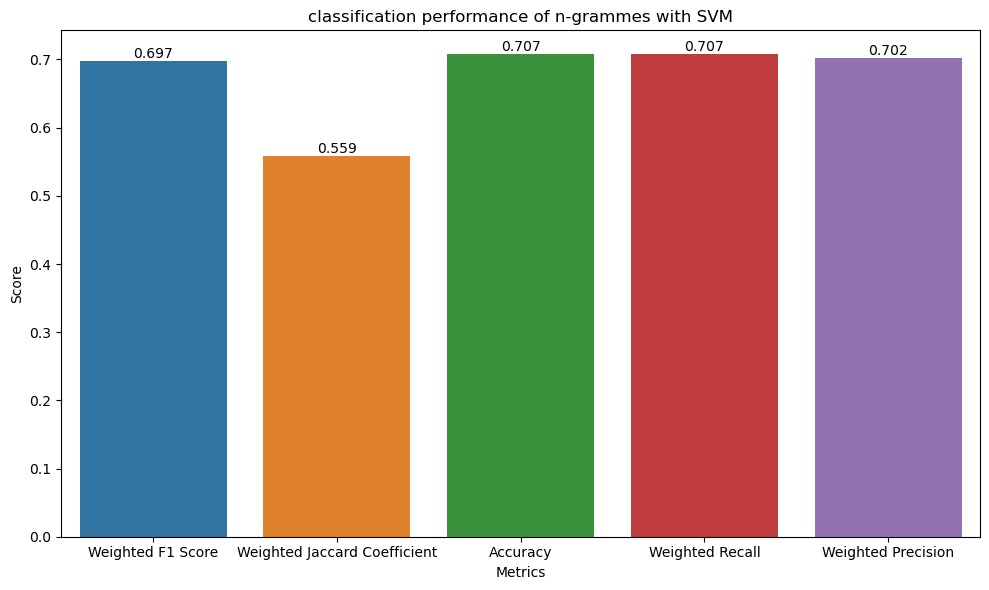

In [29]:
plot_metrics_scores(model_name, metrics_scores)

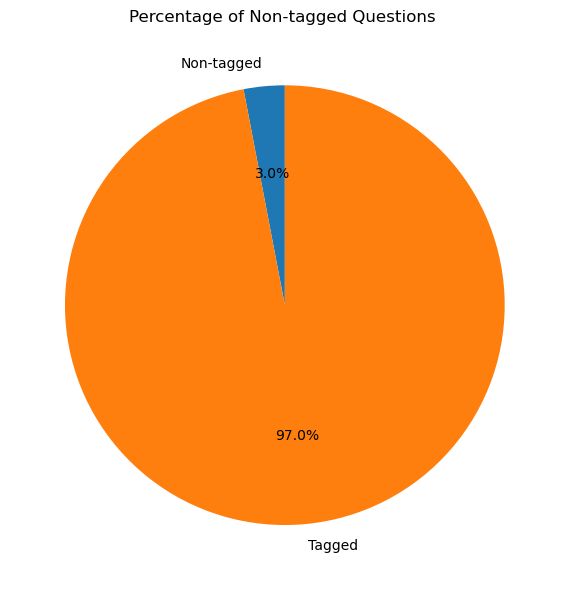

In [30]:
percentage_non_tagged = 3.01
plot_non_tagged_percentage(percentage_non_tagged)

# Réduire les dimensions avec TruncatedSVD

C’est un moyen fréquemment utilisé pour réduire les dimensions. On choisit le modèle TruncatedSVD plutôt que l’ACP dont l’implémentation ne supporte pas les features sparses.

In [ ]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train)
feat_train_svd = pipe_svd.transform(X_train)
feat_train_svd.shape

(5382, 300)

In [ ]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train)
feat_train_svd = pipe_svd.transform(X_train)
feat_train_svd.shape

(5382, 300)

In [ ]:
feat_test_svd = pipe_svd.transform(X_test)

In [ ]:
from sklearn.svm import SVC
clf2 = SVC()

# Fit the SVM model on the training data
clf2.fit(feat_train_svd, y_train_labels)

SVC()

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = clf2.predict(feat_test_svd)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.5906840216719301
Weighted Jaccard Coefficient: 0.4408951479565628
Accuracy: 0.580267558528428
Weighted Recall: 0.580267558528428
Weighted Precision: 0.6386515807462976


# TF IDF WITH RANDOM FOREST

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
pipe2 = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe2.fit(X_train)
feat_train2 = pipe2.transform(X_train)
feat_train2.shape

(5382, 23104)

In [ ]:
import numpy as np
y_train_labels = np.argmax(y_train.values, axis=1)

In [ ]:
feat_test2 = pipe2.transform(X_test)
feat_test2.shape

(598, 23104)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
import time

# Initialize RandomForest with OneVsRest
param_rfc = {
    "estimator__max_depth": [5, 25, 50],
    "estimator__min_samples_leaf": [1, 5, 10],
    "estimator__class_weight": ["balanced"]
}

multi_rfc_cv = GridSearchCV(
    OneVsRestClassifier(RandomForestClassifier()),
    param_grid=param_rfc,
    n_jobs=-1,
    cv=2,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True,
    verbose=3
)

# Record the start time
start_time = time.time()

multi_rfc_cv.fit(feat_train2, y_train_labels)

# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV Execution Time: {execution_time} seconds")


Fitting 2 folds for each of 9 candidates, totalling 18 fits
GridSearchCV Execution Time: 298.7993493080139 seconds


In [ ]:
# Save the best model with pickle
best_rfc_model = multi_rfc_cv.best_estimator_
with open("best_model_rfc.pkl", "wb") as f:
    pickle.dump(best_rfc_model, f)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_rfc_model.predict(feat_test2)
y_test_labels = np.argmax(y_test.values, axis=1)
# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)

Weighted F1 Score: 0.6462525034203823
Weighted Jaccard Coefficient: 0.509647988138202
Accuracy: 0.6555183946488294
Weighted Recall: 0.6555183946488294
Weighted Precision: 0.665718722174032


In [ ]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('TF IDF WITH RANDOM FOREST', y_pred_labels)

--------------------------------------------------
Percentage of non-tagged questions for TF IDF WITH RANDOM FOREST model
--------------------------------------------------
TF IDF WITH RANDOM FOREST: 4.18%



4.18

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(10):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
html		python
visual-studio		visual-studio
algorithm		algorithm
css		html
sql-server		sql-server
visual-studio		python
java		java


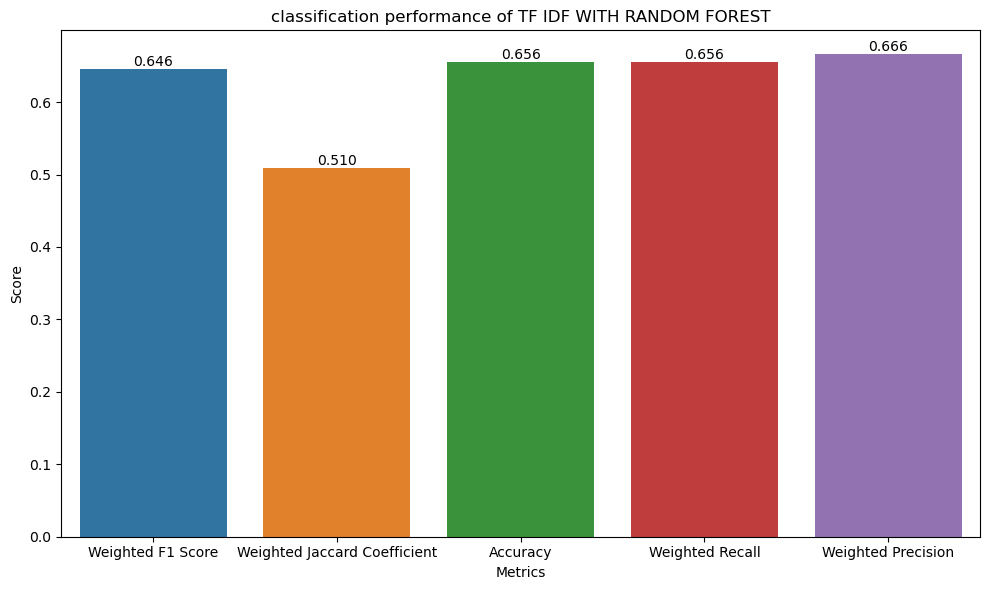

In [31]:

model_name = "TF IDF WITH RANDOM FOREST"
metrics_scores = {
    "Weighted F1 Score": 0.6462525034203823,
    "Weighted Jaccard Coefficient": 0.509647988138202,
    "Accuracy": 0.6555183946488294,
    "Weighted Recall": 0.6555183946488294,
    "Weighted Precision": 0.665718722174032
}

plot_metrics_scores(model_name, metrics_scores)

percentage_non_tagged = 4.18


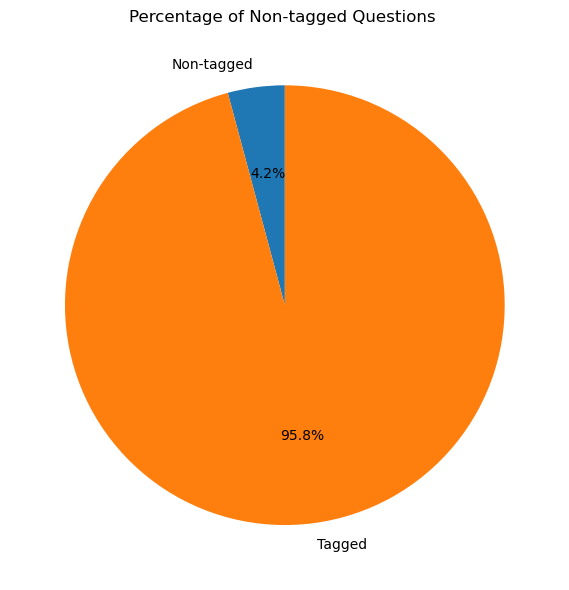

In [32]:
plot_non_tagged_percentage(percentage_non_tagged)

# USE WITH MLP

In [ ]:
import tensorflow_hub as hub
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

class UniversalSentenceEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_url):
        self.model_url = model_url
        self.model = hub.load(self.model_url)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        embeddings = self.model(X)
        return np.array(embeddings)

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Create the pipeline with the custom transformer
pipeUSE = Pipeline([
    ('use', UniversalSentenceEncoderTransformer(model_url=use_model_url))
])

# Fit and transform the data
feat_trainUSE = pipeUSE.fit_transform(X_train)

print(feat_trainUSE.shape)


(5382, 512)


In [ ]:
feat_testUSE = pipeUSE.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Define and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=200, random_state=42)
mlp_classifier.fit(feat_trainUSE, y_train_labels)

MLPClassifier(hidden_layer_sizes=(256, 128), random_state=42)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score

y_pred_labels = mlp_classifier.predict(feat_testUSE)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.6348466431776636
Weighted Jaccard Coefficient: 0.4896868429350547
Accuracy: 0.6387959866220736
Weighted Recall: 0.6387959866220736
Weighted Precision: 0.6363047448741698


In [ ]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('USE WITH MLP', y_pred_labels)

--------------------------------------------------
Percentage of non-tagged questions for USE WITH MLP model
--------------------------------------------------
USE WITH MLP: 3.85%



3.85

In [ ]:
# Save the best model with pickle
with open("mlp_classifier.pkl", "wb") as f:
    pickle.dump(mlp_classifier, f)

In [36]:
model_name = "USE WITH MLP"

metrics_scores = {
    "Weighted F1 Score": 0.6348466431776636,
    "Weighted Jaccard Coefficient": 0.4896868429350547,
    "Accuracy": 0.6387959866220736,
    "Weighted Recall": 0.6387959866220736,
    "Weighted Precision": 0.6363047448741698
}

percentage_non_tagged = 3.85

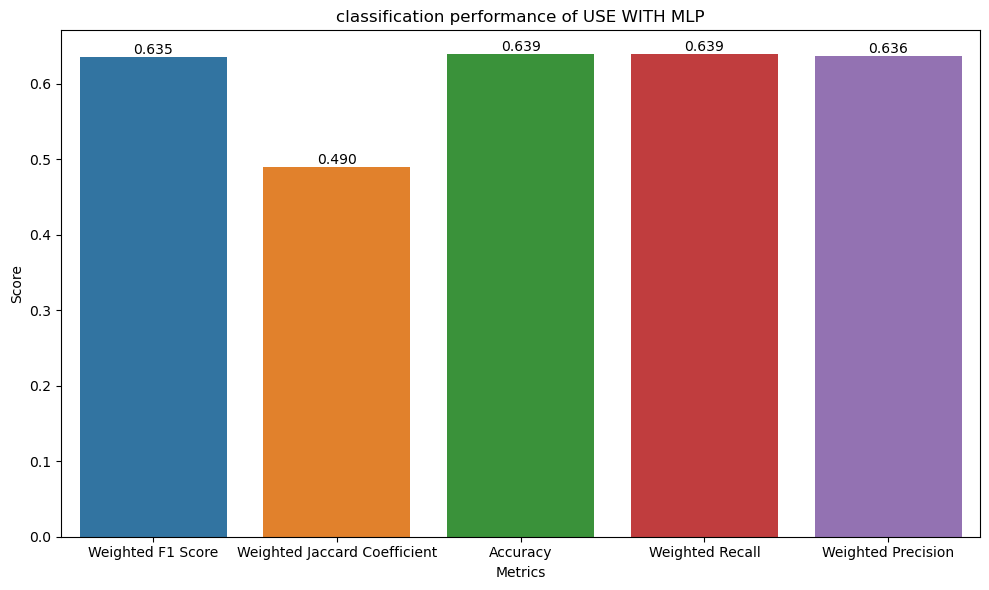

In [37]:
plot_metrics_scores(model_name, metrics_scores)

# BERT WITH CNN

In [12]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Example data and labels (replace this with your actual data)
texts = balanced_data['text_1'].tolist()  # Convert to a list of strings
labels = one_hot_encoded_subset

# Tokenize the text data and convert to input IDs and attention masks
def tokenize_texts(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf", max_length=128)
    return inputs

input_ids = tokenize_texts(texts)['input_ids']
attention_masks = tokenize_texts(texts)['attention_mask']

# Convert TensorFlow tensors to NumPy arrays
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()

# Get BERT embeddings for the input text
bert_embeddings = bert_model.predict([input_ids, attention_masks])[0]

# Convert labels to NumPy arrays
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, labels, test_size=0.1, random_state=42)

# Define and train the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, 5, activation='relu', input_shape=(128, 768)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')  # Adjust the output dimension based on your classification task
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the CNN model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Test accuracy:", accuracy)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

157/157 [==============================] - 525s 3s/step
Epoch 1/5
127/127 [==============================] - 7s 49ms/step - loss: 2.1453 - accuracy: 0.3642 - val_loss: 1.4832 - val_accuracy: 0.5667
Epoch 2/5
127/127 [==============================] - 6s 44ms/step - loss: 1.1998 - accuracy: 0.6274 - val_loss: 1.2514 - val_accuracy: 0.6067
Epoch 3/5
127/127 [==============================] - 5s 43ms/step - loss: 0.7792 - accuracy: 0.7556 - val_loss: 1.2945 - val_accuracy: 0.6222
Epoch 4/5
127/127 [==============================] - 5s 43ms/step - loss: 0.5034 - accuracy: 0.8338 - val_loss: 1.3260 - val_accuracy: 0.6156
Epoch 5/5
16/16 [==============================] - 0s 16ms/step
Test accuracy: 0.618


In [21]:
# Save the model
model.save("BERTCNN.h5")

# Save the train and test data using numpy.save
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score, precision_score


y_test_labels = y_test.argmax(axis=1)
y_pred_labels = y_pred.argmax(axis=1)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)



Weighted F1 Score: 0.6205007428761867
Weighted Jaccard Coefficient: 0.4716459877328499
Accuracy: 0.618
Weighted Recall: 0.618
Weighted Precision: 0.6382433278817414


In [17]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('BERT WITH CNN', y_pred_labels)

--------------------------------------------------
Percentage of non-tagged questions for BERT WITH CNN model
--------------------------------------------------
BERT WITH CNN: 4.4%



4.4

In [16]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
iphone		iphone
javascript		html
visual-studio		asp.net
jquery		jquery
.net		windows
c		c
visual-studio		visual-studio
mysql		mysql
java		java
sql		sql
html		asp.net
algorithm		algorithm
java		java
.net		windows
javascript		jquery
c++		c++
algorithm		algorithm
java		performance
performance		c++
performance		performance


In [40]:
model_name = "BERT WITH CNN"

metrics_scores = {
    "Weighted F1 Score": 0.6205007428761867,
    "Weighted Jaccard Coefficient": 0.4716459877328499,
    "Accuracy": 0.618,
    "Weighted Recall": 0.618,
    "Weighted Precision": 0.6382433278817414
}

percentage_non_tagged = 4.4

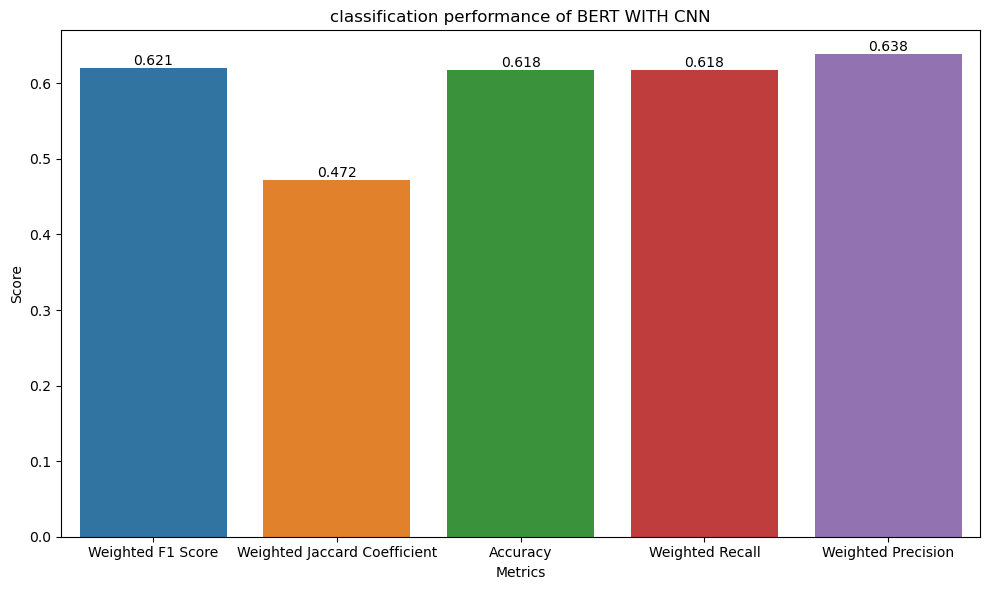

In [41]:
plot_metrics_scores(model_name, metrics_scores)

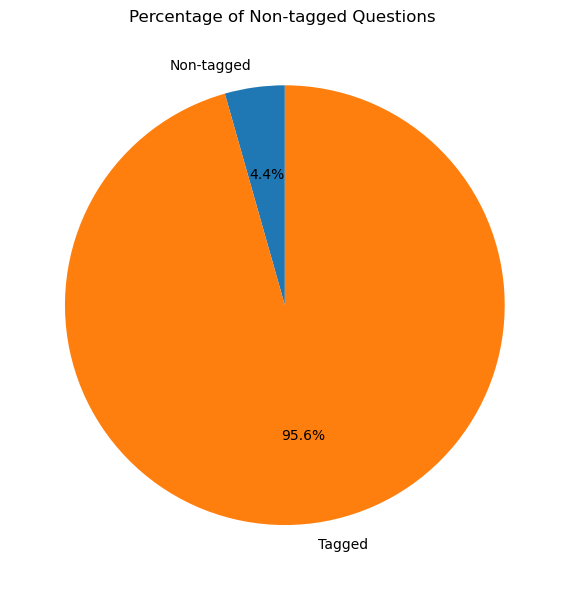

In [42]:
plot_non_tagged_percentage(percentage_non_tagged)

# Word2vec WITH  LR

In [ ]:
pip install gensim


In [ ]:
!python -m spacy download en_core_web_md

2023-08-01 10:58:16.386172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 10:58:17.366232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-01 10:58:18.671782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-01 10:58:18.672236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
import numpy as np
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

def spacy_sum_vectors(phrase, nlp):
    dec = nlp(phrase)
    return sum(w.vector for w in dec)

def spacy_word2vec_features(X, nlp):
    feats = np.vstack([spacy_sum_vectors(p, nlp) for p in X])
    return feats

# Assuming `X_train` and `X_test` are lists of sentences/phrases
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text'].values, one_hot_encoded_subset, test_size=0.1, random_state=42)

continue_wv = True  # You can set this to False if you want to skip using spaCy for word vectors

if continue_wv:
    try:
        wv_train_feat2 = spacy_word2vec_features(X_train, nlp)
        print(wv_train_feat2.shape)
    except ValueError as e:
        print(e)
        continue_wv = False

In [ ]:
from sklearn.linear_model import LogisticRegression
if continue_wv:
    # Convert y_train to 1D array of integers
    y_train_labels = np.argmax(y_train.values, axis=1)

    clfwv2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    clfwv2.fit(wv_train_feat2, y_train_labels)

if continue_wv:
    wv_test_feat2 = spacy_word2vec_features(X_test, nlp)
    y_test_labels = np.argmax(y_test.values, axis=1)
    print(clfwv2.score(wv_test_feat2, y_test_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4431438127090301


In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = clfwv2.predict(wv_test_feat2)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.44299614376505936
Weighted Jaccard Coefficient: 0.2980121620255949
Accuracy: 0.4431438127090301
Weighted Recall: 0.4431438127090301
Weighted Precision: 0.45025856454697144


In [ ]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('Word2vec and Logistic Regression', y_pred_labels)


--------------------------------------------------
Percentage of non-tagged questions for Word2vec and Logistic Regression model
--------------------------------------------------
Word2vec and Logistic Regression: 4.68%



4.68

In [ ]:
import joblib
from google.colab import files

# Save the trained model to the Colab file system
filename = 'clfwv2_model.pkl'
joblib.dump(clfwv2, filename)

['clfwv2_model.pkl']

In [ ]:
import joblib

# Load the trained Word2Vec features
train_feat_filename = 'wv_train_feat2.pkl'
test_feat_filename = 'wv_test_feat2.pkl'

# Load wv_train_feat2
wv_train_feat2 = joblib.load(train_feat_filename)

# Load wv_test_feat2
wv_test_feat2 = joblib.load(test_feat_filename)


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
# Convert y_train to 1D array of integers
y_train_labels = np.argmax(y_train.values, axis=1)
# Initialize Logistic Regression with OneVsRest
param_logit = {
    "estimator__C": [10, 1.0, 0.1],
    "estimator__penalty": ["l1", "l2"],
    "estimator__dual": [False],
    "estimator__solver": ["liblinear"]
}

multi_logit_cv = GridSearchCV(
    OneVsRestClassifier(LogisticRegression()),
    param_grid=param_logit,
    n_jobs=-1,
    cv=5,
    scoring="f1_weighted",
    return_train_score=True,
    refit=True
)
multi_logit_cv.fit(wv_train_feat2,y_train_labels)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
# Save the best model with pickle
best_logit_model = multi_logit_cv.best_estimator_
with open("best_logit_model.pkl", "wb") as f:
    pickle.dump(best_logit_model, f)

In [ ]:
y_test_labels = np.argmax(y_test.values, axis=1)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score, recall_score, precision_score
y_pred_labels = best_logit_model.predict(wv_test_feat2)

# Calculate metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
jaccard = jaccard_score(y_test_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Print metrics
print('Weighted F1 Score:', f1)
print('Weighted Jaccard Coefficient:', jaccard)
print('Accuracy:', accuracy)
print('Weighted Recall:', recall)
print('Weighted Precision:', precision)


Weighted F1 Score: 0.47756255495657535
Weighted Jaccard Coefficient: 0.3286352280945145
Accuracy: 0.48327759197324416
Weighted Recall: 0.48327759197324416
Weighted Precision: 0.4798043772478381


In [ ]:
# Assuming you have y_test_labels and y_pred_labels
show_non_predicted_tags('Word2vec and Logistic Regression', y_pred_labels)

--------------------------------------------------
Percentage of non-tagged questions for Word2vec and Logistic Regression model
--------------------------------------------------
Word2vec and Logistic Regression: 2.84%



2.84

In [ ]:
print("Predicted Tags\tTrue Tags")
print("-----------------------------")
for i in range(20):
    predicted_tag = tags_list[y_pred_labels[i]][0]
    true_tag = tags_list[y_test_labels[i]][0]
    print(f"{predicted_tag}\t\t{true_tag}")

Predicted Tags	True Tags
-----------------------------
algorithm		algorithm
iphone		iphone
javascript		javascript
php		python
sql		visual-studio
c		algorithm
html		html
sql		sql-server
python		python
java		java
html		html
java		c++
jquery		javascript
sql-server		performance
algorithm		algorithm
performance		php
css		iphone
.net		.net
asp.net		asp.net
asp.net		php


In [33]:
model_name = "Word2vec With Logistic Regression"

metrics_scores = {
    "Weighted F1 Score": 0.47756255495657535,
    "Weighted Jaccard Coefficient": 0.3286352280945145,
    "Accuracy": 0.48327759197324416,
    "Weighted Recall": 0.48327759197324416,
    "Weighted Precision": 0.4798043772478381
}

percentage_non_tagged = 2.84


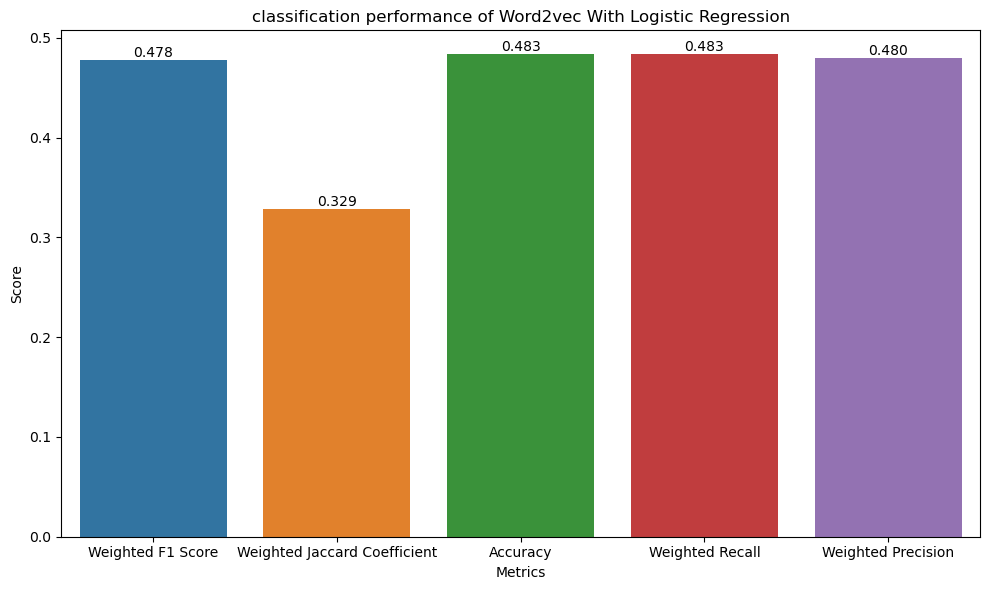

In [34]:
plot_metrics_scores(model_name, metrics_scores)

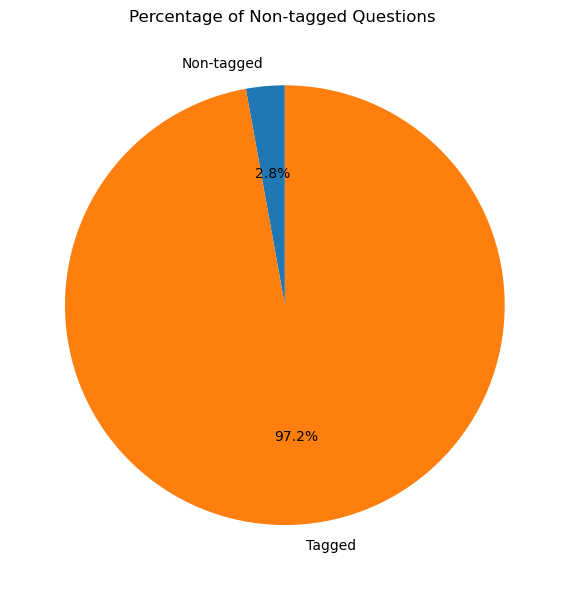

In [35]:
plot_non_tagged_percentage(percentage_non_tagged)

# KERAS

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from sklearn.model_selection import train_test_split
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

VOCAB_SIZE = 1000
batch_size = 32
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',  # Ensure output is integer-encoded
    output_sequence_length=31,  # Set the maximum sequence length
    pad_to_max_tokens=False,  # Allow variable sequence length
    input_shape=(1,)  # Specify the input shape as 1D tensor
)

# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text_1'], one_hot_encoded_subset, test_size=0.1, random_state=42)

encoder.adapt(X_train)
train_encodings = encoder(X_train).numpy()
test_encodings = encoder(X_test).numpy()

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings, y_train)).shuffle(len(train_encodings)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_encodings, y_test)).batch(batch_size)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings, y_train)).shuffle(len(train_encodings)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_encodings, y_test)).batch(batch_size)

# Define the model with the correct input shape and 20 output classes
input_layer = Input(shape=(31,), dtype=tf.int32)
embedding_layer = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True)(input_layer)
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(embedding_layer)
dense_layer = tf.keras.layers.Dense(64, activation='relu')(lstm_layer)
output_layer = tf.keras.layers.Dense(20, activation='softmax')(dense_layer)  # Use softmax activation for multi-class classification

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, validation_steps=len(test_dataset))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 31)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 31, 64)            64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 20)                1300      
                                                                 
Total params: 139,604
Trainable params: 139,604
Non-trainable params: 0
_____________________________________________________

In [ ]:
# Make predictions on the test dataset
y_pred = model.predict(test_dataset)

19/19 [==============================] - 2s 4ms/step


In [ ]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary
y_test_binary = y_test.astype(int)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score

# Calculate weighted F1 score, weighted Jaccard coefficient, weighted precision, and weighted recall using binary predictions
f1_weighted = f1_score(y_test_binary, y_pred_binary, average='weighted')
jaccard_weighted = jaccard_score(y_test_binary, y_pred_binary, average='weighted')
precision_weighted = precision_score(y_test_binary, y_pred_binary, average='weighted')
recall_weighted = recall_score(y_test_binary, y_pred_binary, average='weighted')

print('Weighted F1 Score:', f1_weighted)
print('Weighted Jaccard Coefficient:', jaccard_weighted)
print('Weighted Precision:', precision_weighted)
print('Weighted Recall:', recall_weighted)


Weighted F1 Score: 0.36100359077137506
Weighted Jaccard Coefficient: 0.24211222676604885
Weighted Precision: 0.6763513878825789
Weighted Recall: 0.28929765886287623


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
metrics_scores = {
    "Weighted F1 Score": 0.4078190860185285,
    "Weighted Jaccard Coefficient": 0.2733131289252182,
    "Accuracy": 0.49665552377700806,
    "Weighted Precision": 0.5679025996720752,
    "Weighted Recall": 0.3511705685618729
}
model_name="LSTM with TextVectorization "

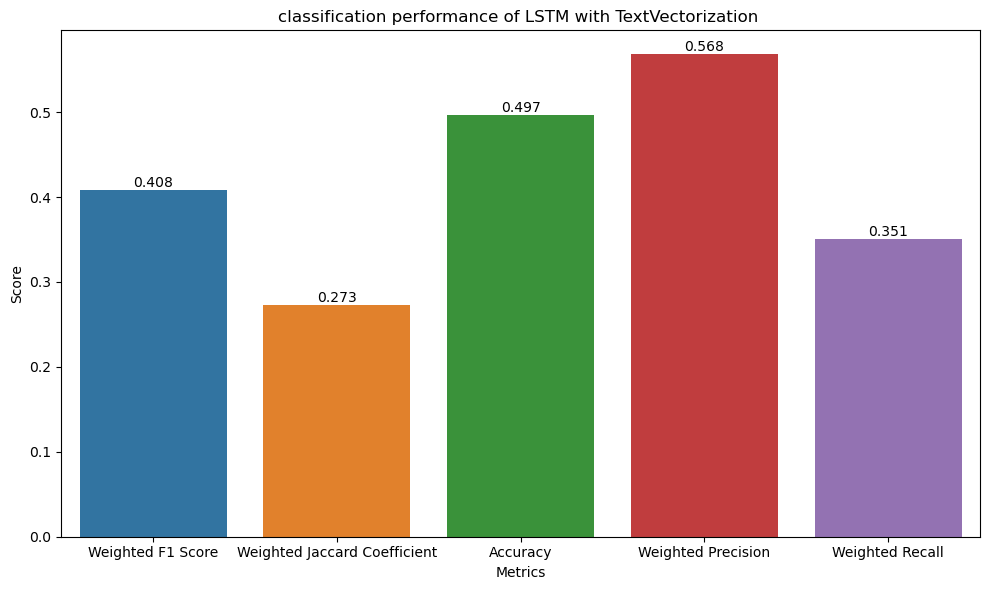

In [39]:
plot_metrics_scores(model_name, metrics_scores)